In [1]:
import utils as ut
import time
import receiverClass as rc
import senderClass as sc
import math
import matplotlib.pyplot as plt

In [4]:

bob = rc.receiver()

alice = sc.sender()
# ---------------------------------------
#     chosen cipher attack
#----------------------------------------
def CCA(C,e,n):
    r = ut.generate_r(n) 
    C_dash= C * ut.PowMod(r,e,n)
    Y = ut.str2int(bob.decrypt(ut.int2str(C_dash)))
    M = ut.PowMod(Y * (ut.InvertModulo(r,n)),1,n)
    # print(ut.int2str(M))
    return(ut.int2str(M))

# ---------------------------------------
#     mathematical attack
#----------------------------------------
def mathematical_attack(cipher, e, n):
    deciphered = ''
    for p in range(3, int(math.sqrt(n)+1)):
        if(n % p == 0):
            # print(p)
            bob.q = n//p
            bob.e = e
            # print(bob.e)
            bob.p = p
            bob.n = n
            deciphered = bob.decrypt(cipher)
            # print(deciphered)
    return deciphered


In [6]:
time_math = []
time_CCA = []
n_list = []

i = 0
for i in range(10, 35 , 5):
    p, q = ut.generate_prime(1<<(i - 1), 1<<i)
    # p , q = ut.generate_primes_bits(i)
    bob.p, bob.q = p, q

    # set value of e and n for both sender and receiver 
    bob.e = ut.generate_e(bob.p,bob.q)
    bob.n = bob.p * bob.q

    alice.e = bob.e
    alice.n = bob.n

    n_list.append(bob.n)
    M = "no"
    cipher_text= alice.encrypt(M)

    start = time.time_ns()
    deciphered_text = CCA(ut.str2int(cipher_text),bob.e,bob.n)
    time_CCA.append(time.time_ns() - start)
    print(time.time_ns() - start)

    start = time.time_ns()
    deciphered_text = mathematical_attack(cipher_text,bob.e,bob.n)
    time_math.append(time.time_ns() - start)
    print(time.time_ns() - start)


508200
0
996200
997300
0
185896800
0
6655550800
0
228428286700


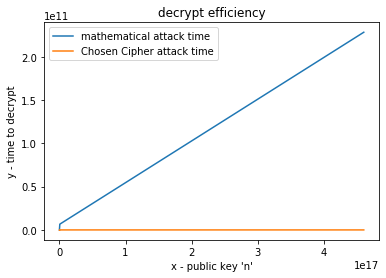

In [7]:
#ploting
plt.plot(n_list, time_math, label = 'mathematical attack time')
plt.plot(n_list, time_CCA, label = 'Chosen Cipher attack time')

plt.xlabel('x - public key \'n\'')
plt.ylabel('y - time to decrypt')
plt.title('decrypt efficiency')

plt.legend(["mathematical attack time", "Chosen Cipher attack time"])
plt.show()